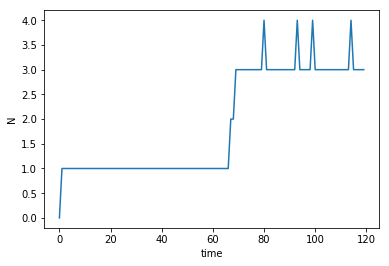

transition function at t=2.5
[[0.61003806 0.2899335  0.08130962 0.01600936 0.00270946]
 [0.2319468  0.44313895 0.2376933  0.0706697  0.01655125]
 [0.05203816 0.19015464 0.43462701 0.23812681 0.08505338]
 [0.00819679 0.0452286  0.19050145 0.44613396 0.30993919]
 [0.00110979 0.00847424 0.05443416 0.24795135 0.68803045]]
Q*p =  [0. 0. 0. 0. 0.]
stationary distribution p =  [1. 1. 1. 1. 1.]


In [0]:
from scipy.linalg import expm
import numpy as np
from matplotlib import pyplot

# generator matrix
Q = np.array([[-1/4, 1/4, 0, 0, 0],[ 1/5, -9/20, 1/4, 0, 0],[ 0, 1/5, -9/20, 1/4, 0],[ 0, 0, 1/5, -9/20, 1/4],[ 0, 0, 0, 1/5, -1/5]])


t = 0       # initial time
i=0
N = 0    # initial amount of students
total_t = 60   # total time
step = .5   # time step
alpha = 1/5   # parameter for exp. distribution to set rate 5 min
beta = 4      # rate how students come
n_ar = np.zeros(int(total_t/step))    # array of observations
t_next = 0;
t_done = 1e5    # just a trigger
free = true

for t in np.arange(0,total_t, step):
    if t > t_next and N<4:
      t_next = np.random.uniform(0,1)/beta    
      N = N + 1

      
    # if registrer ended assistance  
    if t >= t_done: 
      N = N - 1
      t_done = 1e5
      free = true
    
    if free and N>0:
        t_done = np.random.exponential(alpha)+t
        

      
    n_ar[i] = N    # array to plot
    i=i+1
      
      
pyplot.figure(1)
pyplot.xlabel('time')
pyplot.ylabel('N')
pyplot.plot( n_ar )
pyplot.show()
#--------------2 task----------------------------


# estimate at 2.5 time
t = 2.5;
P_t = expm(t*Q)  # transition function is matrix exponential from generator Q
print('transition function at t=2.5')
print(P_t)  

#-------------3 task--------------------------
# as it is seen, generator matrix is singular, so system of linear equations Q*p=0 can not
# be solved with np.linalg.solve method
# but it is clear from Q form, that any vector p=const*[1 1 1] is solution of this system
# let's check it:
p = np.ones(5)
b = Q.dot(p)
print('Q*p = ', b)  # p is solution of equation
print('stationary distribution p = ', p) #p = [1 1 1] is stationary distribution